## Final Project Submission

Please fill out:
* Student name: Kevin Spring
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Business Problem
Our clients is a real estate broker in King County, WA interested in finding a solution for their clients that want to sell their home but are unsure of the price to list. They want us to design a model where they can take in the attributes of their clients home and determine which price to begin listing discussion with their client.

# Summary of Recommendations

## Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Instructions state to remove the following features
#col_remove = ['date', 'view', 'sqft_above', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
#df.drop(axis='columns', columns=col_remove)

In [3]:
# import and inspect data
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [5]:
# Any dulplicated records?
len(df[df.duplicated(subset=['id'], keep=False)].sort_values(by='id'))

353

In [6]:
# Remove duplicates
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [7]:
# How many columns have NaN?
print(df.isna().sum())

df[df.isnull().any(axis=1)].head()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
7,2008000270,1/15/2015,291850.0,3,1.5,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
10,1736800520,4/3/2015,662500.0,3,2.5,3560,9796,1.0,NaN,NONE,...,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
12,114101516,5/28/2014,310000.0,3,1.0,1430,19901,1.5,NO,NONE,...,7 Average,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697


In [8]:
# Any placeholders?
# Look for top occuring values
print('Dataframe\n')
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize = True).head(10), '\n')

Dataframe

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/26/2014     0.006116
6/25/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50   

## Replaceing or Removing NaN values
- `waterfront`: replace NaN with mode of 'No' as most likely these properties are not waterfront.
- `yr_renovated`: replace 0 with 'Never' as this would mean 'never renovated'
- `sqft_basement`: replace '?' placeholder with mode of 0.
- `view`: this is an ordinal categorical feature
    - replace `NaN` with `NONE` (use a dicitonary `0: 'NONE'`, `1: 'FAIR'`, `2: 'AVERAGE'`,
    `3: 'GOOD'`, `4: 'EXCELLENT'`)
- `grade`: This is an ordinal categorical factor but contains string data. I will strip out the string and convert it to nominal data.

In [9]:
# replacing waterfront NaN with 'NO'
df['waterfront'].fillna('NO', inplace=True)

In [10]:
# replace 0 in `yr_renovated` with NaN as this would mean 'never renovated'# 
df.replace(0, 'Never', inplace=True)
df['yr_renovated'].fillna('Unknown', inplace=True)

In [11]:
# clean and fix data type of sqft_basement
## sqft_basement has '?' as a placeholder. Set this to 0.
print('sqft_basement with ? as placeholder:', len(df.loc[df['sqft_basement'] == '?', 'sqft_basement']))
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
print('Removed ? as placeholder:', len(df.loc[df['sqft_basement'] == '?', 'sqft_basement']))

sqft_basement with ? as placeholder: 452
Removed ? as placeholder: 0


In [12]:
# replace `Nan` with `NONE` for column `view`
df['view'].fillna('NONE', inplace=True)

In [13]:
# Clean up grade column
## strip out by spaces and keep the first string, which should be the number
df['grade'] = df['grade'].apply(lambda x: x.split(' ', 1)[0]).astype(int)

In [14]:
# Check that the date is in the correct format
## May have to control for date for my analysis
# format example: 10/13/2014

#df['date'] = pd.to_datetime(df['date'])

# Make new columns with Year, Month of sale
#df['Year'] = df['date'].apply(lambda x:x.strftime('%Y')).astype(int)
#df['Month'] = df['date'].apply(lambda x:x.strftime('%m')).astype(int)

In [15]:
# drop id, date, lat, long column
df.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,7.662792,1791.170215,285.904342,1971.092997,98077.87437,1988.384080,12775.718161
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,1.171971,828.692965,440.008202,29.387141,53.47748,685.537057,27345.621867
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.00000,399.000000,651.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1200.000000,0.000000,1952.000000,98033.00000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,98065.00000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,8.000000,2220.000000,550.000000,1997.000000,98117.00000,2370.000000,10086.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,98199.00000,6210.000000,871200.000000


In [17]:
# Change id, zipcode, lat, long to string
df.describe(include = 'object')

,waterfront,view,condition,yr_renovated
count,21420,21420,21420,21420
unique,2,5,5,71
top,NO,NONE,Average,Never
freq,21274,19316,13900,16876


In [18]:
# How many columns have NaN?
print(df.isna().sum())

df[df.isnull().any(axis=1)].head()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


## Charts to check distribution of variables

In [19]:
#pd.plotting.scatter_matrix(df,figsize  = [12, 12]);
#plt.show()

In [20]:
# Correlation with price
#import matplotlib.pyplot as plt
#%matplotlib inline

X = df.copy()
X.drop(['price'], axis=1, inplace=True)
y = df['price']

#fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(12, 8))
#fig.set_tight_layout(True)

#for index, col in enumerate(X.columns):
#    ax = axes[index//3][index%3]
#    ax.scatter(X[col], y, alpha=0.2)
#    ax.set_xlabel(col)
#    ax.set_ylabel("price")

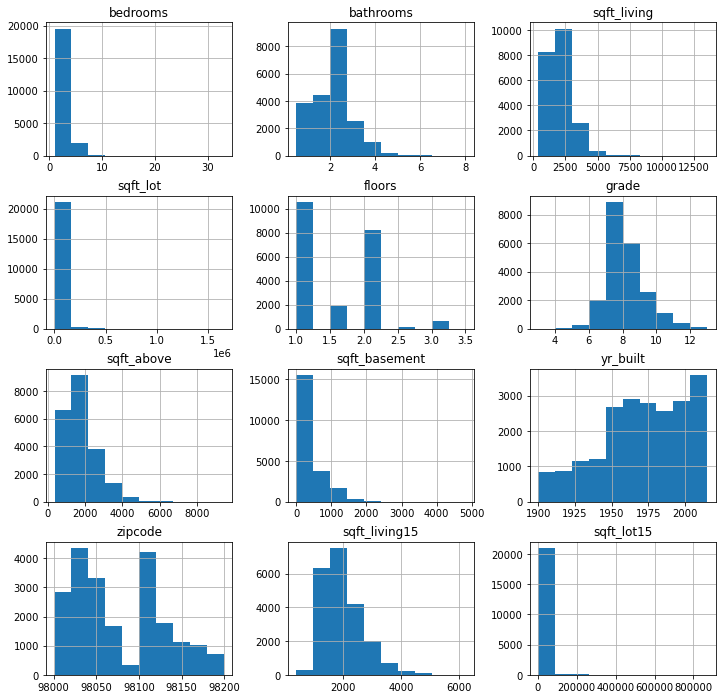

In [21]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
X.hist(ax = ax);

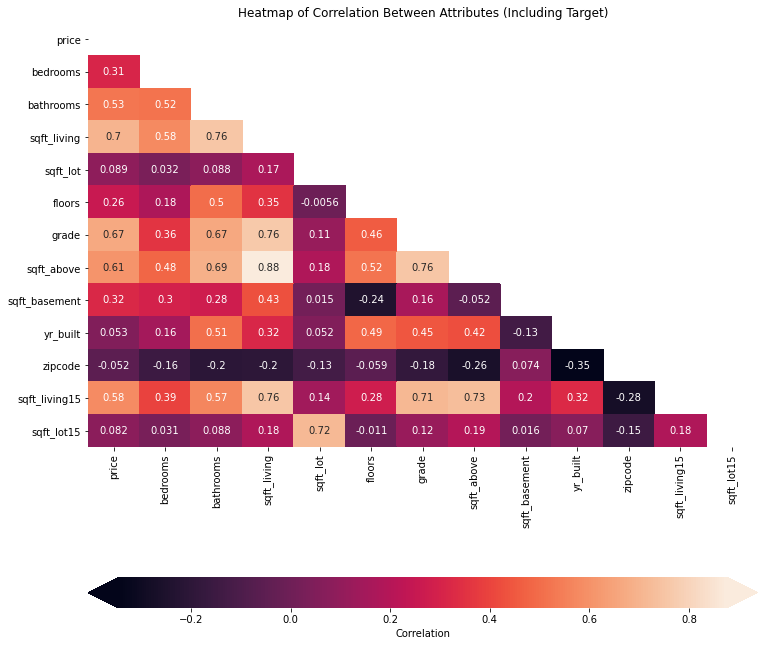

In [22]:
# Make heatmap 
# Run this cell without changes

import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

## Normalize data

### Price data

Skewness: 4.027779
Kurtosis: 34.574789


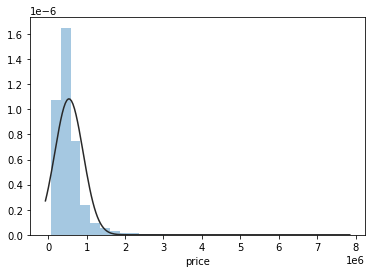

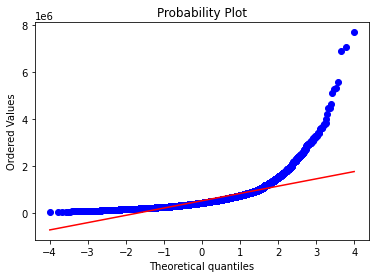

In [23]:
from scipy.stats import norm
from scipy import stats

#histogram and normal probability plot
sns.distplot(df['price'], fit=norm, bins=30, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

# This shows a right-skewed distribution
## https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
print("Skewness: %f" % df['price'].skew()) # Data is highly skewed
print("Kurtosis: %f" % df['price'].kurt()) # leptokurtic (>3)

# Notes: I want to put these plots next to each other

Skewness: 0.431030
Kurtosis: 0.694344


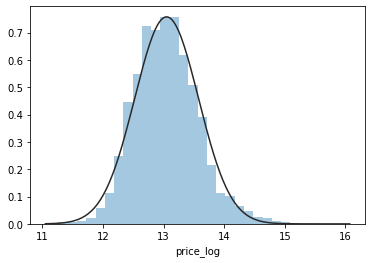

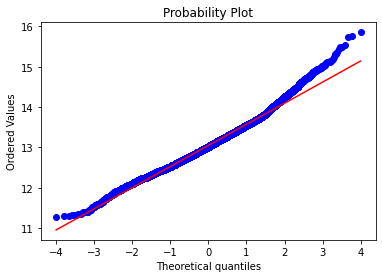

In [24]:
# log transform price data
import numpy as np

df['price_log'] = np.log(df['price'])

#histogram and normal probability plot for log transformed price data
sns.distplot(df['price_log'], fit=norm, bins=30, kde=False);
fig = plt.figure()
res = stats.probplot(df['price_log'], plot=plt)

# This shows a right-skewed distribution
## https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
print("Skewness: %f" % df['price_log'].skew()) # Data is not skewed
print("Kurtosis: %f" % df['price_log'].kurt()) # platykurtic (Kurtosis <3) distributio

### Transform sqft_living

Skewness: 1.472702
Kurtosis: 5.258187


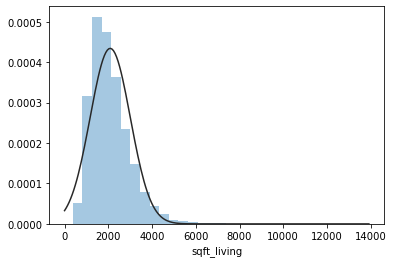

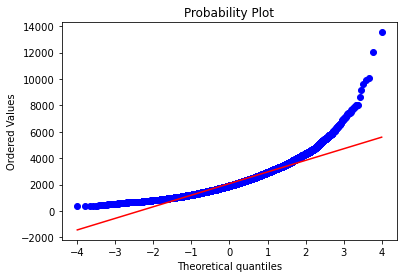

In [25]:
#histogram and normal probability plot
sns.distplot(df['sqft_living'], fit=norm, bins=30, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

# This shows a right-skewed distribution
## https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
print("Skewness: %f" % df['sqft_living'].skew()) # Data is skewed
print("Kurtosis: %f" % df['sqft_living'].kurt()) # leptokurtic (>3)

Skewness: -0.028909
Kurtosis: -0.076885


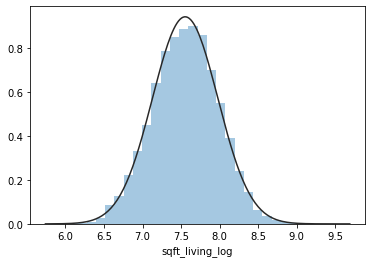

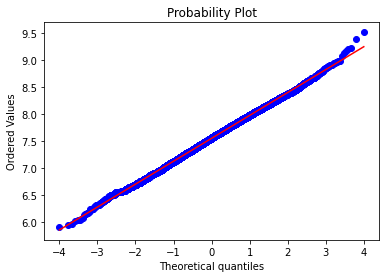

In [26]:
df['sqft_living_log'] = np.log(df['sqft_living'])

#histogram and normal probability plot
sns.distplot(df['sqft_living_log'], fit=norm, bins=30, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living_log'], plot=plt)

# This shows a right-skewed distribution
## https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
print("Skewness: %f" % df['sqft_living_log'].skew()) # Data is skewed
print("Kurtosis: %f" % df['sqft_living_log'].kurt()) # leptokurtic (>3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21420 non-null  float64
 1   bedrooms         21420 non-null  int64  
 2   bathrooms        21420 non-null  float64
 3   sqft_living      21420 non-null  int64  
 4   sqft_lot         21420 non-null  int64  
 5   floors           21420 non-null  float64
 6   waterfront       21420 non-null  object 
 7   view             21420 non-null  object 
 8   condition        21420 non-null  object 
 9   grade            21420 non-null  int64  
 10  sqft_above       21420 non-null  int64  
 11  sqft_basement    21420 non-null  float64
 12  yr_built         21420 non-null  int64  
 13  yr_renovated     21420 non-null  object 
 14  zipcode          21420 non-null  int64  
 15  sqft_living15    21420 non-null  int64  
 16  sqft_lot15       21420 non-null  int64  
 17  price_log   

## Transform Categorical factors to dummy variables

In [32]:
# Convert to Dummy variables
# test
cat_col = ['waterfront', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 
           'yr_built', 'yr_renovated', 'zipcode']

# label columns as category
df[cat_col] = df[cat_col].astype('category')

one_hot_encoder_df = pd.get_dummies(df[cat_col].copy())

one_hot_encoder_df.info()

# extract continunous features from original df
num_col = df.select_dtypes(include='number')

# merge both num_col and one_hot_encoder_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Columns: 327 entries, waterfront_NO to zipcode_98199
dtypes: uint8(327)
memory usage: 6.8 MB


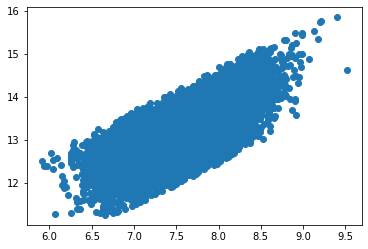

In [29]:
# Split data into train-test-split

y = df['price_log']
X = df.drop(['price', 'price_log', 'sqft_living'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)


plt.scatter(X['sqft_living_log'], y)

In [30]:
# Make linear model 
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)


ValueError: could not convert string to float: 'NO'